In [1]:
### import necessary packages ###
#%matplotlib notebook
import matplotlib.pylab as plt  ##plotting 
from rawice import *            ##all modules from rawice.py
import warnings
import numpy as np
import os
from scipy.optimize import curve_fit

warnings.filterwarnings('ignore')

In [2]:
## location of raw acq data
notebook_path = os.path.abspath("gbo automation.ipyn")
folder_path = os.path.join(os.path.dirname(notebook_path), "gbo_rawadc/")
print(folder_path)
path = os.path.join(os.path.dirname(notebook_path), "gbo_rawadc/000000.h5")

#path = "/Users/rowlandskc/WVU/rawadc/000040.h5"
#folder_path = "/Users/rowlandskc/WVU/rawadc"



## load data from file to object 'acq'
acq = raw_acq(path)
#help(raw_acq)
acq.adc_input

#set the input 
tm4_input = [0,15,12]

/Users/rowlandskc/WVU/gbo_rawadc/
Loaded raw acq HDF5 file ... 


In [3]:
tm4 = acq.check_input(tm4_input)
tm4.inspect_maser()

Checking input [0, 15, 12] ... 
0.6489540752770376


In [12]:
tm4.get_curve_fit()

length of single_input.time_streams: 487
single_input.phase_unwrapped length: 487


it takes about 15.5 seconds to run the function above.

size of n_snapshots: 1
# of snapshots: 487
ype of snapshots: <class 'int'>
size of tau_shift: 487
length of tau_shift: 487
type tau_shift: <class 'numpy.ndarray'>
4.0740526521258005
size of n_snapshots_array: 487


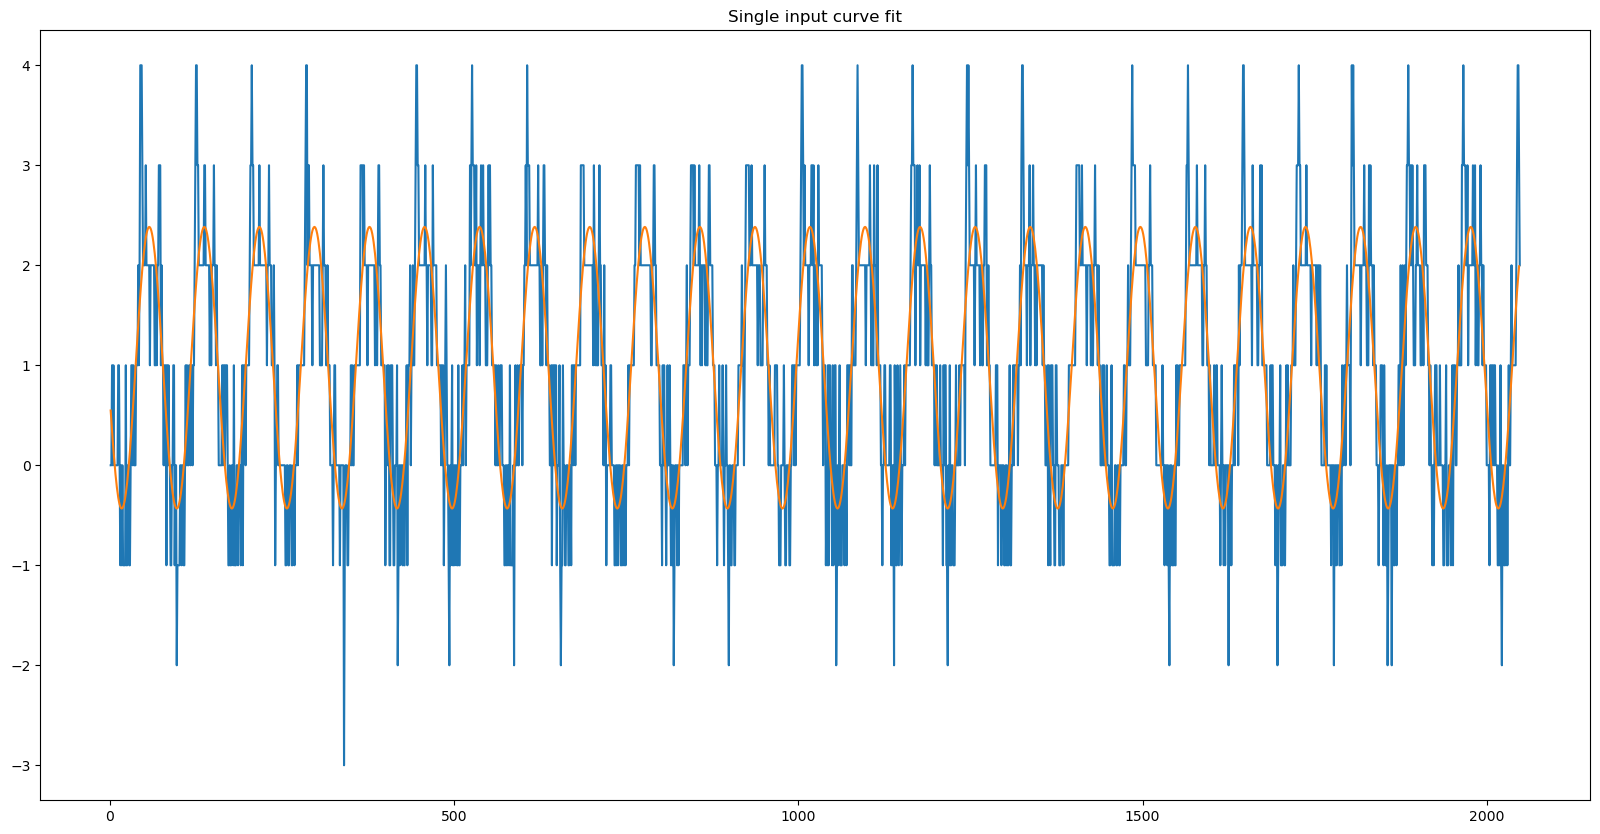

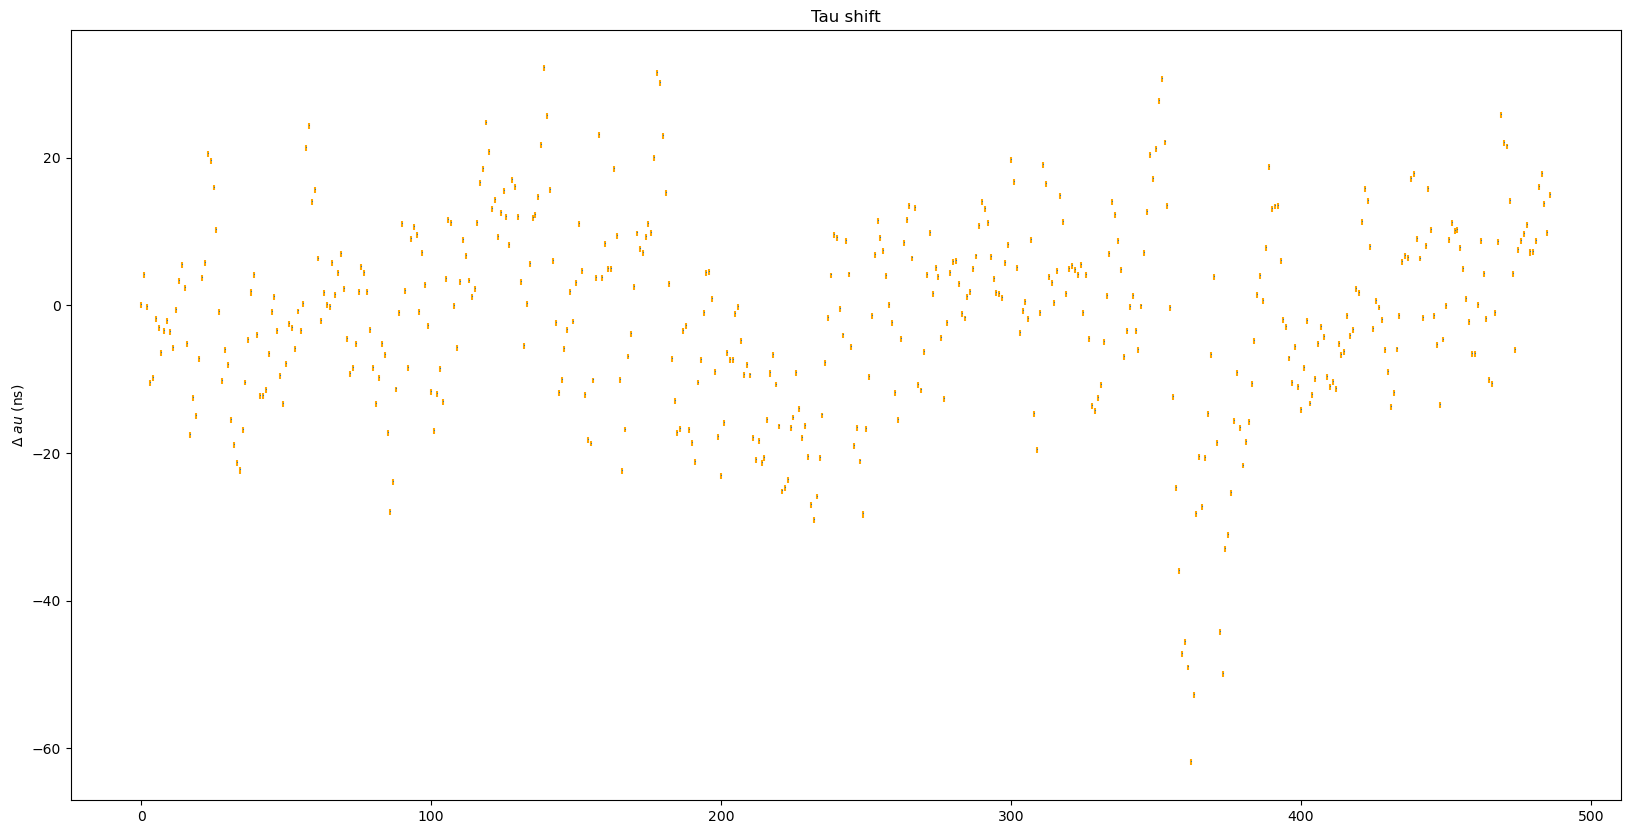

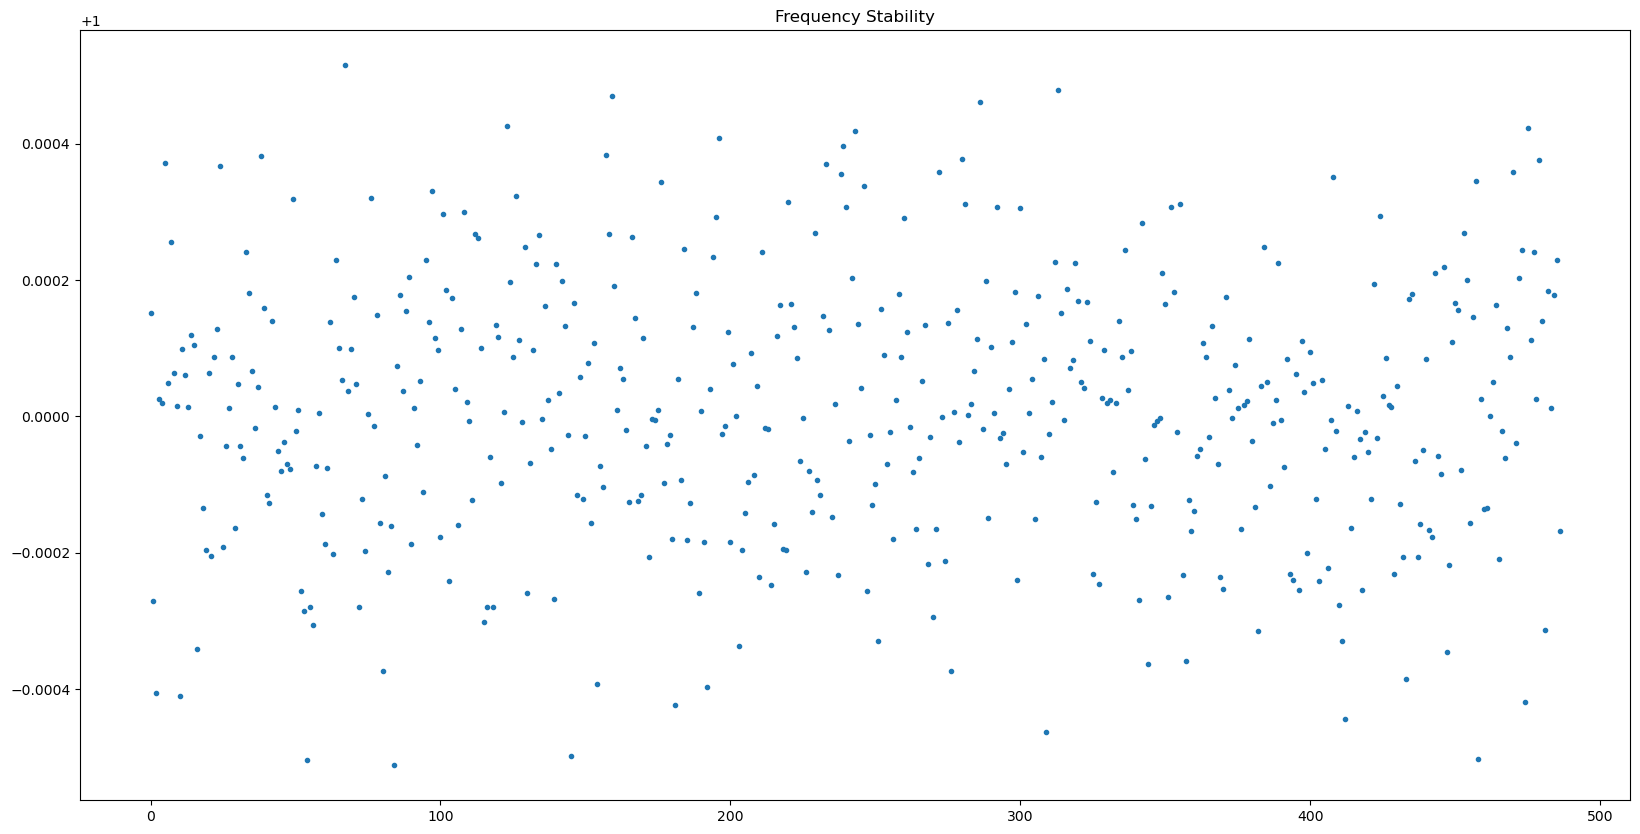

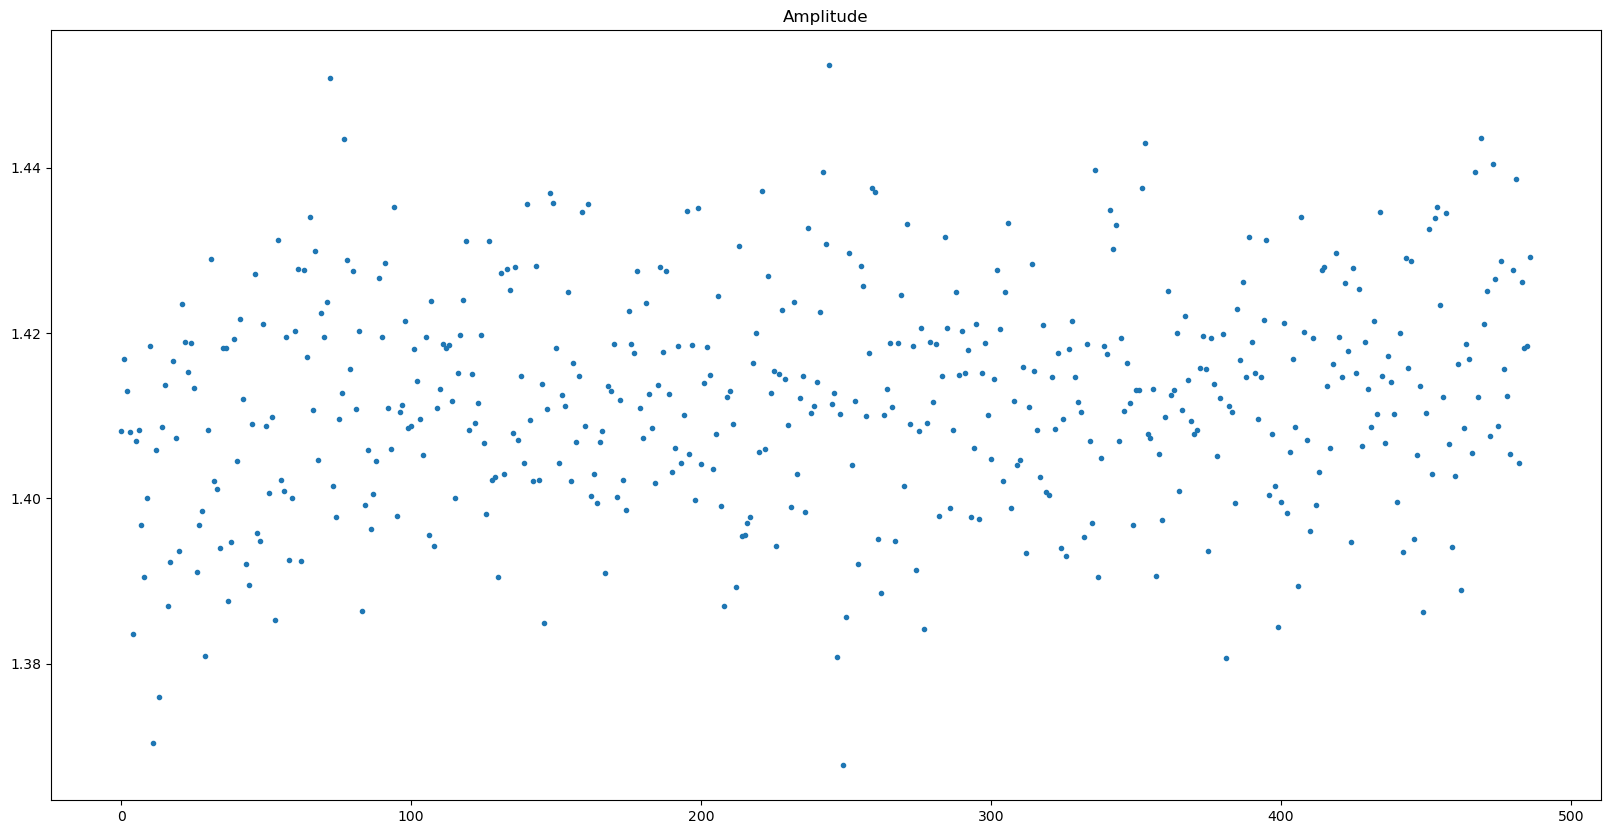

In [5]:
tm4.get_single_curve_fit(i=0)

In [6]:
tm4_clock = analyse_maser(folder_path, tm4_input, 1)

/Users/rowlandskc/WVU/gbo_rawadc/000000.h5
1
Loaded raw acq HDF5 file ... .....................................................................] 0/1
Checking input [0, 15, 12] ... 
0.6489540752770376
1
Done Computing Delay: ############################################################################] 1/1

DONE reading files and getting delays


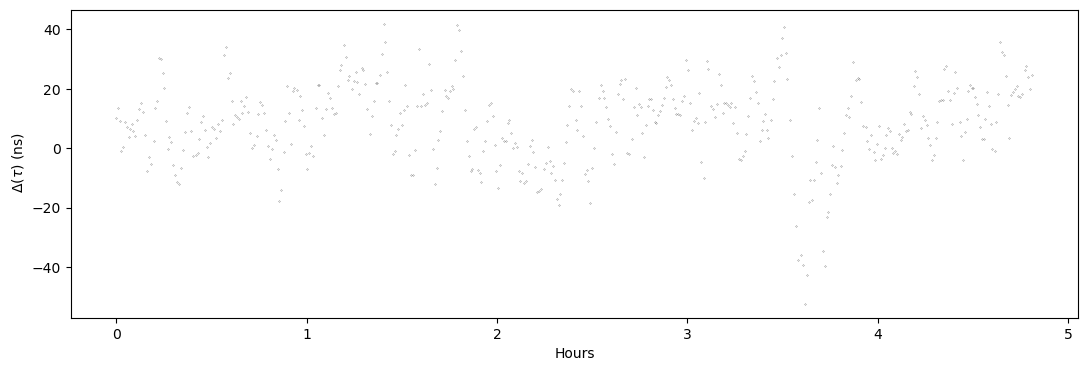

In [7]:
tm4_clock.plot_delays()
#plt.savefig("delays_base.pdf", format="pdf")

Text(0, 0.5, ' $\\Delta(\\tau)$ (ns)')

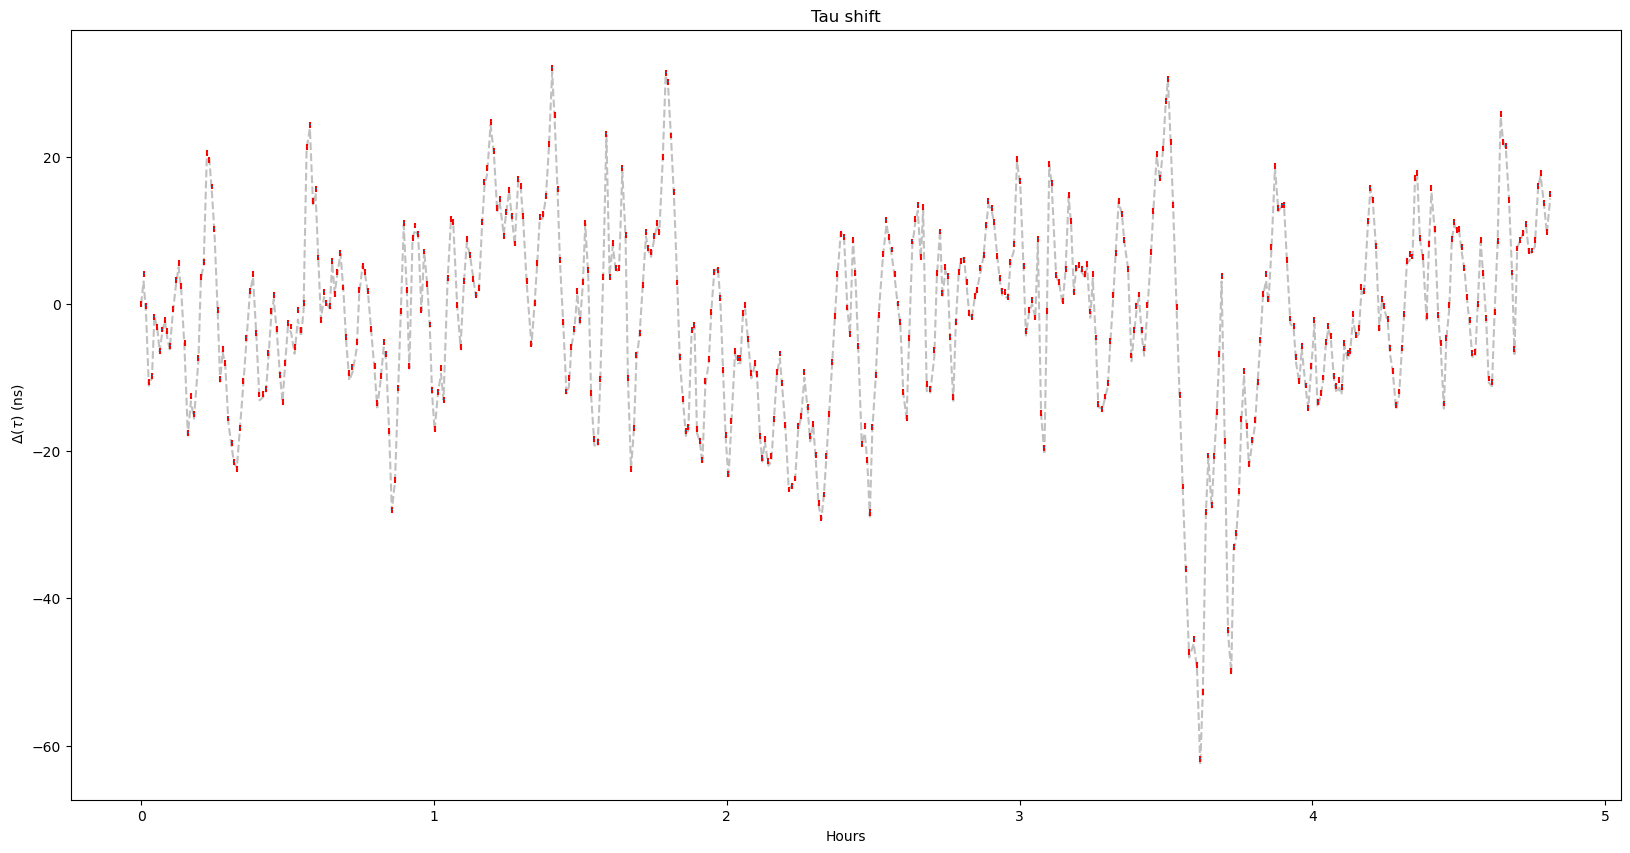

In [8]:
xlist = [val for val in range(0+1, 2049)]
xval = [(val*(1.25e-9)/60/60) for val in xlist]

fig, ax = plt.subplots(figsize=(20,10))      #HEY LOOK AT THIS!!!!
plt.plot(tm4_clock.fpgatime[:512]*2.56e-6/60/60, 10e8*((tm4_clock.taus[:512])-tm4_clock.taus[0]), c = 'silver', ls="--")#, marker = ','
ax.errorbar(tm4_clock.fpgatime[:512]*2.56e-6/60/60, (np.array(tm4.tau_shift[:512])-tm4.tau_shift[0]), yerr=tm4.tau_err[:512], fmt=',', ecolor='red')
ax.set_title('Tau shift')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
#plt.savefig("Updated_tau_shift_base.pdf", format="pdf")

In [9]:
#tm4_clock.taus

In [10]:
#tm4.tau_shift